## Health Data analysis

Data analysis is crucial for businesses and organizations to make informed decisions from raw data. Here are the main types:

1\. Descriptive Analysis
------------------------

*   **What it does:** Summarizes historical data to show what has happened. Uses techniques like mean, median, mode, standard deviation, and range.

2\. Diagnostic Analysis
-----------------------

*   **What it does:** Explores why something happened by drilling down into data to identify patterns, correlations, and anomalies.

3\. Predictive Analysis
-----------------------

*   **What it does:** Uses historical data and statistical techniques to predict future outcomes.

4\. Prescriptive Analysis
-------------------------

*   **What it does:** Recommends actions to take by using optimization techniques to identify the best course of action.

5\. Exploratory Analysis
------------------------

*   **What it does:** Discovers patterns and relationships in data, often used in early stages to gain understanding and generate hypotheses.

6\. Inferential Analysis
------------------------

*   **What it does:** Uses statistical methods to draw conclusions about a population based on a sample of data.

7\. Causal Analysis
-------------------

*   **What it does:** Identifies cause-and-effect relationships between variables.

8\. Mechanistic Analysis
------------------------

*   **What it does:** Focuses on understanding the underlying mechanisms that drive a phenomenon.

### Setup Environment

In [3]:
%run initializespark.ipynb

<IPython.core.display.Javascript object>

24/12/14 14:27:14 WARN Utils: Your hostname, Nihars-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.5.118 instead (on interface en0)
24/12/14 14:27:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/niharmalali/.ivy2/cache
The jars for the packages stored in: /Users/niharmalali/.ivy2/jars
io.delta#delta-spark_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-9176ae28-cf95-474d-89b5-57d0b5b2e331;1.0
	confs: [default]
	found io.delta#delta-spark_2.12;3.2.1 in central


:: loading settings :: url = jar:file:/Volumes/D/WORKSPACE/PYTHON/notebooktest/.venv/lib/python3.13/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found io.delta#delta-storage;3.2.1 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
:: resolution report :: resolve 98ms :: artifacts dl 4ms
	:: modules in use:
	io.delta#delta-spark_2.12;3.2.1 from central in [default]
	io.delta#delta-storage;3.2.1 from central in [default]
	org.antlr#antlr4-runtime;4.9.3 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   3   |   0   |   0   |   0   ||   3   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-9176ae28-cf95-474d-89b5-57d0b5b2e331
	confs: [default]
	0 artifacts copied, 3 already retrieved (0kB/3ms)
24/12/14 14:27:15 WARN NativeCodeLoader: Unable to load native-hadoo

+-------------+
|      Message|
+-------------+
|Testing Spark|
+-------------+



### Loading Data

In [4]:
# Load the data into a dataframe
health_df = spark.read.parquet(
    "testdata/health_data_dev.parquet", header=True, inferSchema=True
)

# Show the first few rows of the dataframe
health_df.show()

+---------+---+------+------+-------------+
|PatientID|Age|Height|Weight|BloodPressure|
+---------+---+------+------+-------------+
|        1| 64|   161|    95|          161|
|        2| 67|   154|    61|          115|
|        3| 73|   156|    66|          171|
|        4| 20|   154|    74|          120|
|        5| 23|   197|    79|          116|
|        6| 79|   153|    71|          128|
|        7| 23|   162|    96|          105|
|        8| 59|   186|    75|          147|
|        9| 29|   190|    66|          115|
|       10| 39|   164|    69|          110|
|       11| 41|   165|    83|          109|
|       12| 70|   170|    90|          113|
|       13| 56|   185|    82|           98|
|       14| 43|   173|    86|           97|
|       15| 26|   165|    56|          173|
|       16| 44|   163|    71|          164|
|       17| 44|   171|    81|           82|
|       18| 32|   198|    63|          149|
|       19| 78|   199|    57|           92|
|       20| 21|   155|    74|   

### 1\. Descriptive Analysis
------------------------
Summarizes historical data to show what has happened. Uses techniques like mean, median, mode, standard deviation, and range.

In [5]:
# Perform descriptive analysis
health_df.describe().show()

+-------+------------------+------------------+-----------------+------------------+----------------+
|summary|         PatientID|               Age|           Height|            Weight|   BloodPressure|
+-------+------------------+------------------+-----------------+------------------+----------------+
|  count|               100|               100|              100|               100|             100|
|   mean|              50.5|             48.62|           173.29|             74.91|          131.52|
| stddev|29.011491975882016|18.117896727219243|15.59804118756227|14.045449315157079|29.4952418693133|
|    min|                 1|                20|              150|                50|              80|
|    max|               100|                79|              199|                97|             179|
+-------+------------------+------------------+-----------------+------------------+----------------+



2\. Diagnostic Analysis
-----------------------

*   **What it does:** Explores why something happened by drilling down into data to identify patterns, correlations, and anomalies.

In [6]:
from pyspark.sql.functions import col, corr

# Import necessary libraries

# Example: Find correlation between 'age' and 'BloodPressure'
age_bp_corr = health_df.select(corr("Age", "BloodPressure")).collect()[0][0]
print(f"Correlation between age and blood pressure: {age_bp_corr}")

# Identify anomalies using standard deviation
mean_bp = health_df.select("BloodPressure").groupBy().mean().collect()[0][0]
stddev_bp = (
    health_df.select("BloodPressure")
    .groupBy()
    .agg({"BloodPressure": "stddev"})
    .collect()[0][0]
)

# Define a threshold for anomalies (e.g., 3 standard deviations from the mean)
threshold = 3 * stddev_bp

# Filter out anomalies
anomalies = health_df.filter(
    (col("BloodPressure") > mean_bp + threshold)
    | (col("BloodPressure") < mean_bp - threshold)
)
print("Anomalies in blood pressure:")
anomalies.show()

Correlation between age and blood pressure: 0.1883905284146517
Anomalies in blood pressure:
+---------+---+------+------+-------------+
|PatientID|Age|Height|Weight|BloodPressure|
+---------+---+------+------+-------------+
+---------+---+------+------+-------------+



In [7]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Select features and label
feature_columns = ["Age", "Height", "Weight"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(health_df)

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Initialize and train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="BloodPressure")
lr_model = lr.fit(train_data)

# Make predictions on the test set
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(
    labelCol="BloodPressure", predictionCol="prediction", metricName="rmse"
)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Show some predictions
predictions.select("Age", "Height", "Weight", "BloodPressure", "prediction").show()

24/12/14 14:27:20 WARN Instrumentation: [54573769] regParam is zero, which might cause numerical instability and overfitting.
24/12/14 14:27:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/12/14 14:27:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/12/14 14:27:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Root Mean Squared Error (RMSE) on test data: 23.94467759125246
+---+------+------+-------------+------------------+
|Age|Height|Weight|BloodPressure|        prediction|
+---+------+------+-------------+------------------+
| 73|   156|    66|          171|136.69386583614914|
| 23|   162|    96|          105|122.96374413096802|
| 29|   190|    66|          115|125.97673237329845|
| 43|   173|    86|           97|129.83777004468934|
| 21|   155|    74|          124|120.51700567499779|
| 66|   181|    90|          119| 138.1058944468813|
| 28|   184|    51|          150|124.30682889709348|
| 25|   163|    68|          129| 122.2368234319562|
| 39|   184|    93|          108|129.98195607415033|
| 39|   185|    82|          161|129.50500270198762|
| 34|   180|    61|          138|126.34923566032867|
| 52|   168|    70|          166|131.38384416428318|
| 29|   185|    93|           96|126.90468351977717|
| 30|   164|    90|          143|  125.063151258109|
| 48|   190|    70|          167|132

### 3\. Predictive Analysis
-----------------------

##### *   **What it does:** Uses historical data and statistical techniques to predict future outcomes.

In [8]:
def train_and_evaluate_linear_regression(
    data, feature_columns, label_column, test_size=0.2, seed=42
):
    from pyspark.ml.feature import VectorAssembler
    from pyspark.ml.regression import LinearRegression
    from pyspark.ml.evaluation import RegressionEvaluator

    # Assemble features
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    data = assembler.transform(data)

    # Split the data into training and test sets
    train_data, test_data = data.randomSplit([1 - test_size, test_size], seed=seed)

    # Initialize and train the linear regression model
    lr = LinearRegression(featuresCol="features", labelCol=label_column)
    lr_model = lr.fit(train_data)

    # Make predictions on the test set
    predictions = lr_model.transform(test_data)

    # Evaluate the model
    evaluator = RegressionEvaluator(
        labelCol=label_column, predictionCol="prediction", metricName="rmse"
    )
    rmse = evaluator.evaluate(predictions)
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

    # Show some predictions
    predictions.select(*feature_columns, label_column, "prediction").show()

    return lr_model, rmse, predictions


def predict_blood_pressure(lr_model, age, height, weight):
    from pyspark.ml.linalg import Vectors
    from pyspark.sql import Row

    # Create a single row dataframe with the input features
    input_data = spark.createDataFrame(
        [
            Row(
                Age=age,
                Height=height,
                Weight=weight,
                features=Vectors.dense([age, height, weight]),
            )
        ]
    )

    # Make prediction
    prediction = lr_model.transform(input_data)
    predicted_bp = prediction.select("prediction").collect()[0][0]
    return predicted_bp


# Example usage
lr_model, rmse, predictions = train_and_evaluate_linear_regression(
    health_df, ["Age", "Height", "Weight"], "BloodPressure"
)

24/12/14 14:27:21 WARN Instrumentation: [5fd14ca2] regParam is zero, which might cause numerical instability and overfitting.


Root Mean Squared Error (RMSE) on test data: 23.94467759125246
+---+------+------+-------------+------------------+
|Age|Height|Weight|BloodPressure|        prediction|
+---+------+------+-------------+------------------+
| 73|   156|    66|          171|136.69386583614914|
| 23|   162|    96|          105|122.96374413096802|
| 29|   190|    66|          115|125.97673237329845|
| 43|   173|    86|           97|129.83777004468934|
| 21|   155|    74|          124|120.51700567499779|
| 66|   181|    90|          119| 138.1058944468813|
| 28|   184|    51|          150|124.30682889709348|
| 25|   163|    68|          129| 122.2368234319562|
| 39|   184|    93|          108|129.98195607415033|
| 39|   185|    82|          161|129.50500270198762|
| 34|   180|    61|          138|126.34923566032867|
| 52|   168|    70|          166|131.38384416428318|
| 29|   185|    93|           96|126.90468351977717|
| 30|   164|    90|          143|  125.063151258109|
| 48|   190|    70|          167|132

In [9]:
predicted_bp = predict_blood_pressure(lr_model, 44, 70, 168)
print(f"Predicted Blood Pressure: {predicted_bp}")

Predicted Blood Pressure: 124.59861292138045


### 5\. Exploratory Analysis
------------------------

##### *   **What it does:** Discovers patterns and relationships in data, often used in early stages to gain understanding and generate hypotheses.

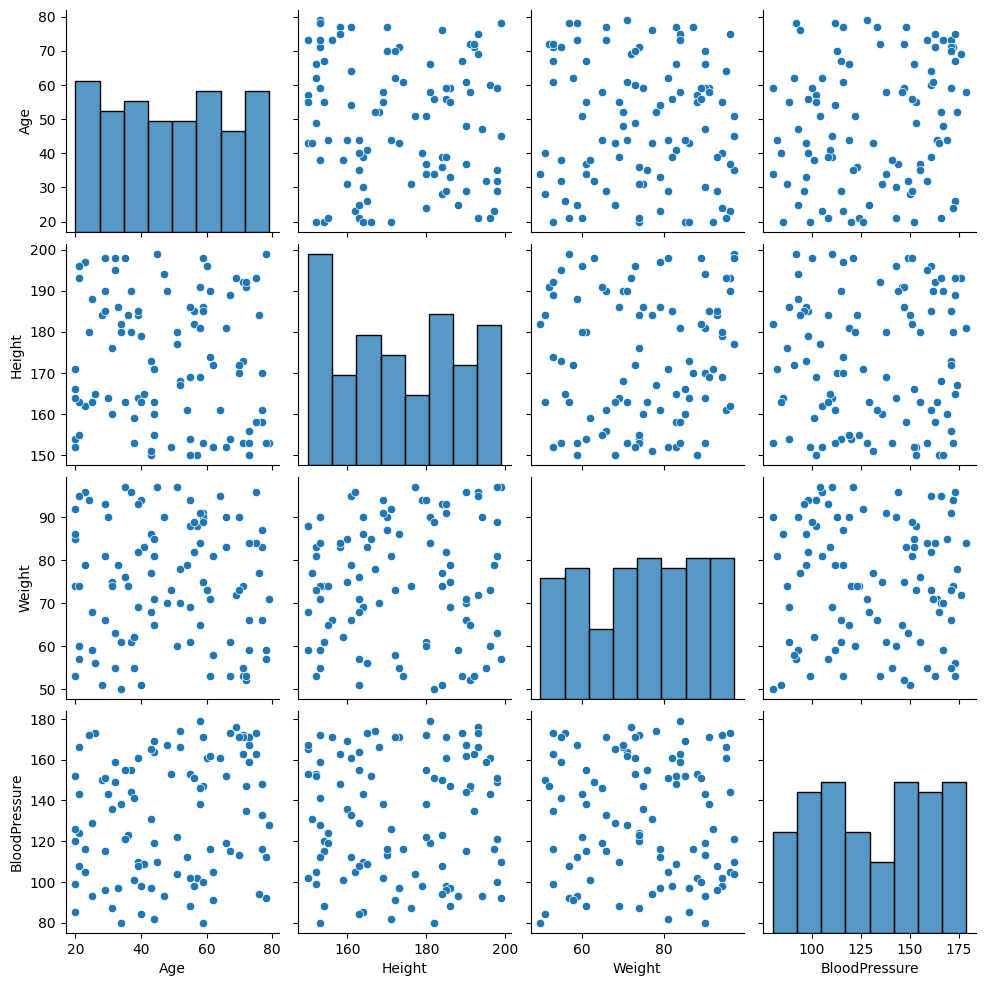

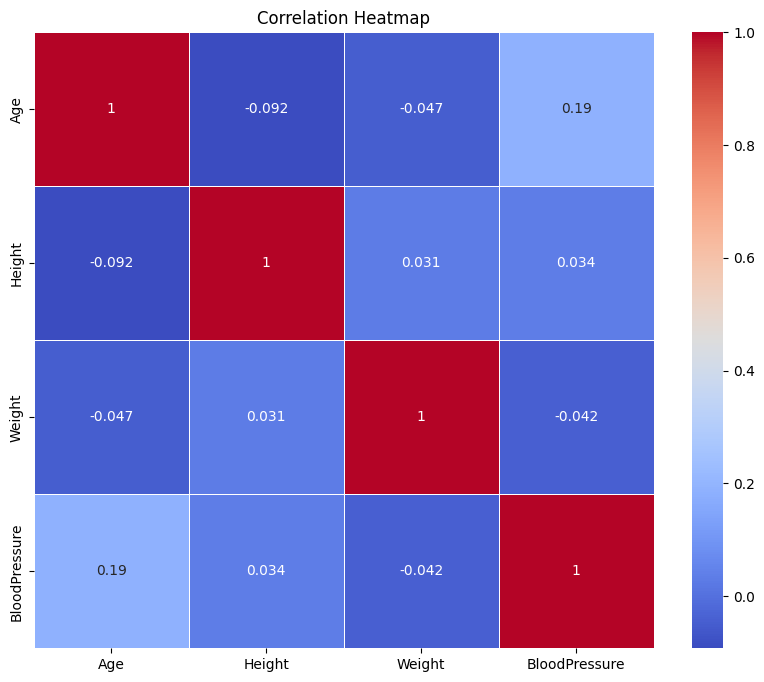

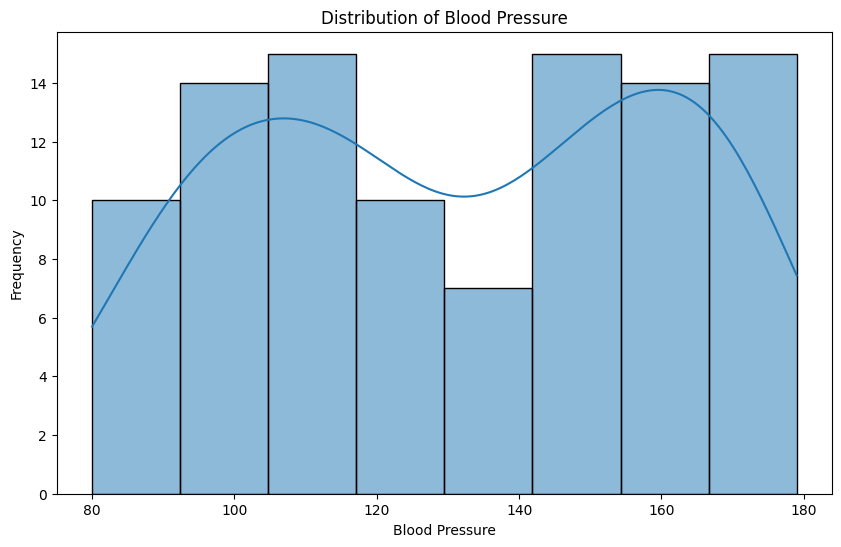

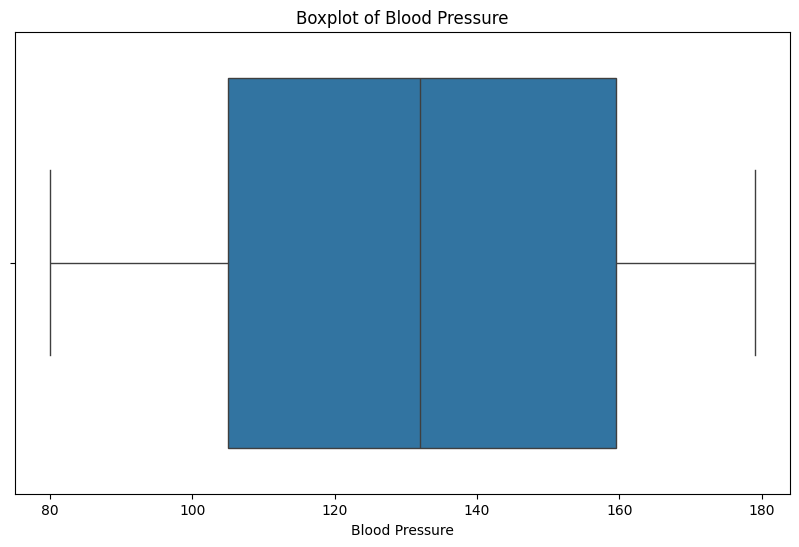

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for easier plotting
health_pd_df = health_df.toPandas()

# Plotting pairplot to see relationships between variables
sns.pairplot(health_pd_df[["Age", "Height", "Weight", "BloodPressure"]])
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = health_pd_df[["Age", "Height", "Weight", "BloodPressure"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Plotting distribution of BloodPressure
plt.figure(figsize=(10, 6))
sns.histplot(health_pd_df["BloodPressure"], kde=True)
plt.title("Distribution of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()

# Boxplot to check for outliers in BloodPressure
plt.figure(figsize=(10, 6))
sns.boxplot(x=health_pd_df["BloodPressure"])
plt.title("Boxplot of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.show()

### 6\. Inferential Analysis
------------------------

##### *   **What it does:** Uses statistical methods to draw conclusions about a population based on a sample of data.

In [11]:
from scipy.stats import ttest_ind

# Convert Spark DataFrame to Pandas DataFrame for easier analysis
health_pd_df = health_df.select("Age", "Height", "Weight", "BloodPressure").toPandas()

# Separate the data into two groups based on Gender
older_bp = health_pd_df[health_pd_df["Age"] > 40]["BloodPressure"]
younger_bp = health_pd_df[health_pd_df["Age"] < 40]["BloodPressure"]

## Perform t-test to compare the means of BloodPressure between males and females
t_stat, p_value = ttest_ind(older_bp, younger_bp, nan_policy="omit")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis: There is a significant difference in Blood Pressure between older population and younger population."
    )
else:
    print(
        "Fail to reject the null hypothesis: There is no significant difference in Blood Pressure between older population and younger population."
    )

T-statistic: 1.1861163089320705
P-value: 0.23850369711265426
Fail to reject the null hypothesis: There is no significant difference in Blood Pressure between older population and younger population.


### Causal Analysis
-------------------

##### *   **What it does:** Identifies cause-and-effect relationships between variables.

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests

# Convert Spark DataFrame to Pandas DataFrame for easier analysis
health_pd_df = health_df.select("Age", "Height", "Weight", "BloodPressure").toPandas()

# Perform Granger causality test to see if Age causes BloodPressure
max_lag = 4
test_result = grangercausalitytests(
    health_pd_df[["BloodPressure", "Age"]], max_lag, verbose=False
)

print(test_result)
# Perform Granger causality test to see if Weight causes BloodPressure
test_result = grangercausalitytests(
    health_pd_df[["BloodPressure", "Weight"]], max_lag, verbose=False
)

# Perform Granger causality test to see if Height causes BloodPressure
test_result = grangercausalitytests(
    health_pd_df[["BloodPressure", "Height"]], max_lag, verbose=False
)

{np.int64(1): ({'ssr_ftest': (np.float64(0.4667540214551039), np.float64(0.49612981124554), np.float64(96.0), np.int64(1)), 'ssr_chi2test': (np.float64(0.4813400846255759), np.float64(0.4878159395994981), np.int64(1)), 'lrtest': (np.float64(0.48017372087429067), np.float64(0.4883436387465089), np.int64(1)), 'params_ftest': (np.float64(0.4667540214551127), np.float64(0.49612981124553013), np.float64(96.0), 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x13598a390>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x135989850>, array([[0., 1., 0.]])]), np.int64(2): ({'ssr_ftest': (np.float64(0.32814938852834086), np.float64(0.7210859523998663), np.float64(93.0), np.int64(2)), 'ssr_chi2test': (np.float64(0.6915836575436001), np.float64(0.7076597861810923), np.int64(2)), 'lrtest': (np.float64(0.6891548329499528), np.float64(0.7085196989660452), np.int64(2)), 'params_ftest': (np.float64(0.3281493885283741), np.float64(0.72108595239984

/Volumes/D/WORKSPACE/PYTHON/notebooktest/.venv/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/D/WORKSPACE/PYTHON/notebooktest/.venv/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/D/WORKSPACE/PYTHON/notebooktest/.venv/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
